In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pio.templates.default = 'plotly_white'

In [2]:
df = pd.read_excel("CLV.xlsx")

In [ ]:
df.head()

In [3]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(df)

Customer ID    20.54
Description     0.56
Invoice         0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Country         0.00
dtype: float64


# Data Cleaning

In [ ]:
df.shape

In [4]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [5]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(df)

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
dtype: float64


In [ ]:
df.describe()

In [6]:
df['Date'] = df['InvoiceDate'].astype(str).str.split(' ').str[0]

In [ ]:
df.head()

In [7]:
df.drop(columns = "InvoiceDate",inplace=True)

In [ ]:
df.head()

# RFM Analysis

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Recency'] = (datetime.now().date()-df['Date'].dt.date).dt.days

In [10]:
frequency_data = df.groupby("Customer ID")['Invoice'].count().reset_index()
frequency_data.rename(columns={"Invoice":"Frequency"},inplace=True)
df = df.merge(frequency_data, on="Customer ID",how='left')

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Recency,Frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,5100,63
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,5100,63
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,5100,63


In [12]:
df['Total'] = df['Quantity'] * df['Price']

In [13]:
monetary_data = df.groupby("Customer ID")['Total'].sum().reset_index()
monetary_data.rename(columns={'Total':'MonetaryValue'},inplace=True)
df = df.merge(monetary_data,on='Customer ID',how='left')

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Recency,Frequency,Total,MonetaryValue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,5100,63,83.4,1187.08
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,5100,63,100.8,1187.08
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,5100,63,30.0,1187.08


In [15]:
recency_scores = [5,4,3,2,1]
frequency_scores = [1,2,3,4,5]
monetary_scores = [1,2,3,4,5]

In [16]:
df['Recency_scores'] = pd.cut(df['Recency'],bins=5,labels = recency_scores)
df['Frequency_scores'] = pd.cut(df['Frequency'],bins=5,labels = frequency_scores)
df['Monetary_scores'] = pd.cut(df['MonetaryValue'],bins=5,labels = monetary_scores)

In [17]:
df['Recency_scores']=df['Recency_scores'].astype(int)
df['Frequency_scores']=df['Frequency_scores'].astype(int)
df['Monetary_scores']=df['Monetary_scores'].astype(int)

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Recency,Frequency,Total,MonetaryValue,Recency_scores,Frequency_scores,Monetary_scores
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,5100,63,83.4,1187.08,1,1,1
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08,1,1,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08,1,1,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,5100,63,100.8,1187.08,1,1,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,5100,63,30.0,1187.08,1,1,1


In [19]:
df['RFM_Score'] = df['Recency_scores'] + df['Frequency_scores'] + df['Monetary_scores']

In [20]:
segment_labels = ['LOW','MEDIUM','HIGH']
df['ValueSegment'] = pd.qcut(df['RFM_Score'],q=3,labels=segment_labels)

In [21]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Recency,Frequency,Total,MonetaryValue,Recency_scores,Frequency_scores,Monetary_scores,RFM_Score,ValueSegment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,5100,63,83.4,1187.08,1,1,1,3,LOW
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08,1,1,1,3,LOW
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08,1,1,1,3,LOW
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,5100,63,100.8,1187.08,1,1,1,3,LOW
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,5100,63,30.0,1187.08,1,1,1,3,LOW


In [22]:
df.describe()

,Quantity,Price,Customer ID,Recency,Frequency,Total,MonetaryValue,Recency_scores,Frequency_scores,Monetary_scores,RFM_Score
count,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478,4888.507183,535.899088,19.994081,10849.458851,3.335834,1.218861,1.084645,5.639340
std,101.220424,71.131797,1680.811316,113.500193,1001.260906,99.915863,31263.056573,1.465860,0.759125,0.408241,1.761359
min,-9360.000000,0.000000,12346.000000,4727.000000,1.000000,-25111.090000,-25111.090000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,1.250000,13983.000000,4783.000000,92.000000,4.250000,1133.730000,2.000000,1.000000,1.000000,4.000000
50%,4.000000,1.950000,15311.000000,4881.000000,208.000000,11.250000,2547.090000,3.000000,1.000000,1.000000,6.000000
75%,12.000000,3.750000,16799.000000,4985.000000,465.000000,19.350000,6207.000000,5.000000,1.000000,1.000000,7.000000
max,19152.000000,25111.090000,18287.000000,5100.000000,5710.000000,15818.400000,341776.730000,5.000000,5.000000,5.000000,13.000000


In [23]:
segment_counts = df['ValueSegment'].value_counts().reset_index()
segment_counts.columns = ['ValueSegment','Count']

In [24]:
segment_counts

,ValueSegment,Count
0,MEDIUM,199815
1,LOW,192002
2,HIGH,25717


In [ ]:
pastel_colors = px.colors.qualitative.Pastel

fig_segment_dist = px.bar(segment_counts,x="ValueSegment",y="Count",color = "ValueSegment",
                          color_discrete_sequence=pastel_colors,title="RFM Value Segment Distribution")

fig_segment_dist.update_layout(xaxis_title="RFM Value Segmentation",yaxis_title = "Count",showlegend=False)

fig_segment_dist.show()

In [25]:
df['RFM_Customer_Segments'] = ''
df.loc[df['RFM_Score']>=9, 'RFM_Customer_Segments'] = "Champions"
df.loc[(df['RFM_Score']>=6) & (df['RFM_Score']<9), 'RFM_Customer_Segments'] = "Potential Loyalists"
df.loc[(df['RFM_Score']>=5) & (df['RFM_Score']<6), 'RFM_Customer_Segments'] = "At Risk Customers"
df.loc[(df['RFM_Score']>=4) & (df['RFM_Score']<5), 'RFM_Customer_Segments'] = "Can't lose"
df.loc[(df['RFM_Score']>=3) & (df['RFM_Score']<4), 'RFM_Customer_Segments'] = "Lost Customers"

In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Recency,Frequency,Total,MonetaryValue,Recency_scores,Frequency_scores,Monetary_scores,RFM_Score,ValueSegment,RFM_Customer_Segments
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,5100,63,83.4,1187.08,1,1,1,3,LOW,Lost Customers
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08,1,1,1,3,LOW,Lost Customers
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,5100,63,81.0,1187.08,1,1,1,3,LOW,Lost Customers
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,5100,63,100.8,1187.08,1,1,1,3,LOW,Lost Customers
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,5100,63,30.0,1187.08,1,1,1,3,LOW,Lost Customers


In [27]:
segment_product_counts = df.groupby(['ValueSegment', 'RFM_Customer_Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

In [ ]:
fig_treemap_segment_product = px.treemap(segment_product_counts,path = ['ValueSegment','RFM_Customer_Segments'],
                                        values = 'Count',color = 'ValueSegment',color_discrete_sequence=px.colors.qualitative.Pastel,
                                        title = "RFM Customer Segment by Value")
fig_treemap_segment_product.show()

In [28]:
df['RFM_Product_Segments'] = ''
df.loc[df['RFM_Score']>=23, 'RFM_Product_Segments'] = "Top Performing Products"
df.loc[(df['RFM_Score']<23) & (df['RFM_Score']>=15), 'RFM_Product_Segments'] = "Decent Performing Products"
df.loc[(df['RFM_Score']<15) & (df['RFM_Score']>=5), 'RFM_Product_Segments'] = "Slow Moving Products"
df.loc[(df['RFM_Score']<5), 'RFM_Product_Segments'] = "Excess Inventory"

In [ ]:
df.head()

In [29]:
print(df[['Description', 'RFM_Product_Segments']])

                                Description  RFM_Product_Segments
0       15CM CHRISTMAS GLASS BALL 20 LIGHTS      Excess Inventory
1                        PINK CHERRY LIGHTS      Excess Inventory
2                       WHITE CHERRY LIGHTS      Excess Inventory
3              RECORD FRAME 7" SINGLE SIZE       Excess Inventory
4            STRAWBERRY CERAMIC TRINKET BOX      Excess Inventory
...                                     ...                   ...
417529                 FELTCRAFT DOLL ROSIE  Slow Moving Products
417530         FELTCRAFT PRINCESS LOLA DOLL  Slow Moving Products
417531       FELTCRAFT PRINCESS OLIVIA DOLL  Slow Moving Products
417532   PINK FLORAL FELTCRAFT SHOULDER BAG  Slow Moving Products
417533               JUMBO STORAGE BAG SUKI  Slow Moving Products

[417534 rows x 2 columns]


In [30]:
segment_product_counts = df.groupby(['ValueSegment', 'RFM_Product_Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

In [ ]:
fig_treemap_segment_product = px.treemap(segment_product_counts,path=['ValueSegment','RFM_Product_Segments'],values='Count',
                                        color='ValueSegment',color_discrete_sequence=px.colors.qualitative.Pastel,
                                        title='RFM Product Segments by Value')
fig_treemap_segment_product.show()

In [ ]:
champions_segment = df[df['RFM_Customer_Segments']=='Champions']
fig = go.Figure()
fig.add_trace(go.Box(y=df['Recency_scores'],name='Recency'))
fig.add_trace(go.Box(y=df['Frequency_scores'],name='Frequency'))
fig.add_trace(go.Box(y=df['Monetary_scores'],name='Monetary'))

fig.update_layout(title='Distribution of RFM with Champions Segment',yaxis_title='RFM Value',showlegend=True)

In [ ]:
champions_segment

In [31]:
correlation_matrix = champions_segment[['Recency_scores', 'Frequency_scores', 'Monetary_scores']].corr()

NameError: name 'champions_segment' is not defined

In [ ]:
fig_heatmap = go.Figure(data=go.Heatmap(
                        z=correlation_matrix.values,
                        x=correlation_matrix.columns,
                        y=correlation_matrix.columns,
                        colorscale='RdBu',
                        colorbar=dict(title='Correlation')))
fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')
fig_heatmap.show()

 Here, The recency and Monetary Correlation is -0.21.  it means customers that spends more money will not be recent and if they are recent they want spend more money

In [ ]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel
segment_counts = df['RFM_Customer_Segments'].value_counts()
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,marker=dict(color=pastel_colors))])
champions_color = 'rgb(158, 202, 225)'

fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)], 
                  marker_line_color='rgb(8, 48, 107)', marker_line_width=1.5, opacity=0.6)

fig.update_layout(title='Comparison of RFM Segments', xaxis_title='RFM Segments', yaxis_title='Number of Customers', showlegend=False)
fig.show()

In [ ]:
location_quantity = df.groupby('Country')['Quantity'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=location_quantity['Country'], y=location_quantity['Quantity']))
fig.update_layout(title='Country_quantity', xaxis_title='location', yaxis_title='Customers')
fig.show()

In [ ]:
segment_scores =  df.groupby('RFM_Customer_Segments')['Recency_scores', 'Frequency_scores', 'Monetary_scores'].mean().reset_index()
# Create a grouped bar chart to compare segment scores
fig = go.Figure()

fig.add_trace(go.Bar( x=segment_scores['RFM_Customer_Segments'], 
                     y=segment_scores['Recency_scores'], name='Recency Score', 
                     marker_color='rgb(158,202,225)'
))

fig.add_trace(go.Bar( x=segment_scores['RFM_Customer_Segments'], 
                     y=segment_scores['Frequency_scores'], name='Frequency Score', 
                     marker_color='rgb(94,158,217)'
))

fig.add_trace(go.Bar( x=segment_scores['RFM_Customer_Segments'], 
                     y=segment_scores['Monetary_scores'], name='Monetary Score', 
                     marker_color='rgb(32,102,148)'
))

fig.update_layout(title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
                  xaxis_title='RFM Segments', yaxis_title='Score', barmode='group', showlegend=True)
fig.show()

In [ ]:
sns.ecdfplot(data=df['RFM_Score'])

Non linear trend

In [32]:
import scipy.stats as stats

In [33]:
skewness = stats.skew(df['RFM_Score'])

print("Skewness:", skewness)

Skewness: 0.5547627362545696


In [34]:
df['RFM_Score'].describe()

count    417534.000000
mean          5.639340
std           1.761359
min           3.000000
25%           4.000000
50%           6.000000
75%           7.000000
max          13.000000
Name: RFM_Score, dtype: float64

In [35]:
df['RFM_Score'].median()

6.0

In [ ]:
fig = px.box(df, y="RFM_Score")
fig.show()

In [ ]:
outliers = df[df['RFM_Score']>10]

In [ ]:
outliers.shape

In [ ]:
df.head()

In [36]:
df_new = df.copy()

In [37]:
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from lifetimes import ModifiedBetaGeoFitter


In [38]:
summary = lifetimes.utils.summary_data_from_transaction_data(df, "Customer ID", "Date", "Total")

In [39]:
summary = summary.reset_index()

In [40]:
summary.head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,9.0,294.0,360.0,-17.186667
1,12347.0,1.0,37.0,39.0,711.790000
2,12348.0,0.0,0.0,73.0,0.000000
3,12349.0,3.0,328.0,370.0,890.380000
4,12351.0,0.0,0.0,10.0,0.000000


In [41]:
print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 1360
Total Number of Recency with 0: 1360
Total Number of Monetary Value with 0: 1364


# Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model

In [42]:
summary_bgf = summary.copy()

In [43]:
summary_bgf.head(2)

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,9.0,294.0,360.0,-17.186667
1,12347.0,1.0,37.0,39.0,711.790000


In [44]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)

In [45]:
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 4383 subjects, a: 0.04, alpha: 56.19, b: 1.93, r: 0.86>

In [46]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.860759,0.026544,0.808734,0.912784
alpha,56.190242,2.078990,52.115422,60.265063
a,0.040686,0.015445,0.010414,0.070959
b,1.925118,1.149928,-0.328741,4.178977


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

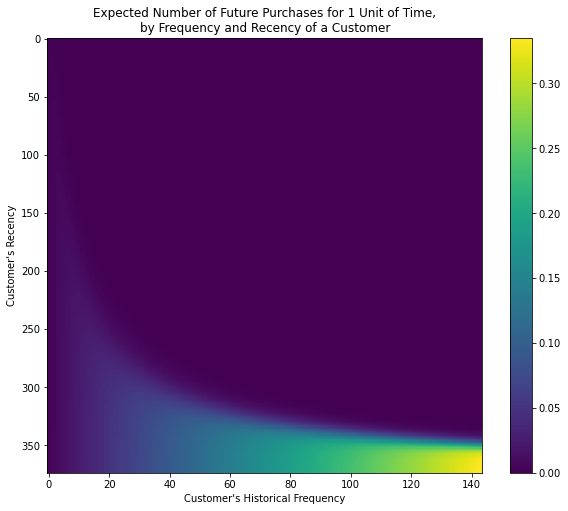

In [47]:
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

In [48]:
t = 30
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

In [49]:
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases
1631,14606.0,95.0,370.0,371.0,191.216105,6.719000
1291,14156.0,98.0,367.0,373.0,1858.303571,6.889293
254,12748.0,98.0,370.0,370.0,210.991122,6.946341
2165,15311.0,114.0,373.0,373.0,467.286930,8.014684
1869,14911.0,143.0,373.0,373.0,957.638322,10.038942


In [50]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [51]:
summary_bgf.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,actual_30
0,12346.0,9.0,294.0,360.0,-17.186667,0.694162,0.918367
1,12347.0,1.0,37.0,39.0,711.790000,0.570597,0.810811
2,12348.0,0.0,0.0,73.0,0.000000,0.199050,NaN
3,12349.0,3.0,328.0,370.0,890.380000,0.267256,0.274390
4,12351.0,0.0,0.0,10.0,0.000000,0.387149,NaN


In [52]:
summary_bgf = summary_bgf.fillna(value = 0)

In [53]:
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [54]:
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [55]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.051990707259228
Average Error:  0.4093050827299788
Root Mean Squared Error: 2.0129557141823136


In [56]:
bgf_mse_purchase_30 = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

In [57]:
res_summary = summary_bgf[summary_bgf["frequency"] > 0]

In [58]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

<AxesSubplot:>

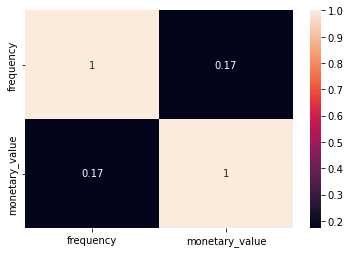

In [59]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

# Gamma - Gamma Model

In [60]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [61]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 2819 subjects, p: 1.53, q: 3.67, v: 601.28>

In [62]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.525624,0.077901,1.372939,1.678310
q,3.666000,0.159261,3.353848,3.978153
v,601.280577,53.615160,496.194862,706.366291


In [63]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]

In [64]:
summary_.shape

(2819, 8)

In [65]:
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"],summary_["monetary_value"])


In [66]:
summary_.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,Expected_Avg_Sales
1,12347.0,1.0,37.0,39.0,711.790,0.570597,0.810811,0.240214,477.917941
3,12349.0,3.0,328.0,370.0,890.380,0.267256,0.274390,0.007134,689.296157
5,12352.0,1.0,17.0,27.0,200.050,0.649353,1.764706,1.115353,291.660072
8,12356.0,2.0,44.0,59.0,1325.905,0.726450,1.363636,0.637186,868.073879
10,12358.0,2.0,356.0,366.0,644.590,0.200021,0.168539,-0.031481,504.461652


In [67]:
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 348.4002266940505
Actual Average Sales: 342.58160627695025
Difference: -5.818620417100249
Mean Squared Error: 18124.366876107306
Root Mean Squared Error: 134.62676879472116


In [68]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [69]:
summary_.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv
1,12347.0,1.0,37.0,39.0,711.790,0.570597,0.810811,0.240214,477.917941,6656.286885
3,12349.0,3.0,328.0,370.0,890.380,0.267256,0.274390,0.007134,689.296157,4639.627868
5,12352.0,1.0,17.0,27.0,200.050,0.649353,1.764706,1.115353,291.660072,4607.565030
8,12356.0,2.0,44.0,59.0,1325.905,0.726450,1.363636,0.637186,868.073879,15459.397237
10,12358.0,2.0,356.0,366.0,644.590,0.200021,0.168539,-0.031481,504.461652,2541.144719


In [70]:
summary_.sort_values(by = "Error", ascending = False)

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv
2504,15794.0,1.0,1.0,372.0,102.000000,0.068700,30.000000,29.931300,255.972840,443.048517
3893,17622.0,2.0,2.0,233.0,194.145000,0.125199,30.000000,29.874801,264.062850,826.963515
1044,13804.0,1.0,1.0,71.0,30.000000,0.399631,30.000000,29.600369,229.767020,2256.937625
3268,16812.0,3.0,4.0,17.0,209.233333,1.537177,22.500000,20.962823,258.870023,9645.870120
513,13091.0,1.0,2.0,366.0,1976.000000,0.071597,15.000000,14.928403,938.052110,1691.693951
...,...,...,...,...,...,...,...,...,...,...
3546,17181.0,1.0,222.0,230.0,155.520000,0.190425,0.135135,-0.055289,275.452500,1312.054277
4071,17857.0,1.0,276.0,276.0,1335.200000,0.164283,0.108696,-0.055588,704.820309,2904.468536
1947,15012.0,1.0,203.0,211.0,191.060000,0.203921,0.147783,-0.056138,288.387984,1469.062929
4185,18011.0,1.0,194.0,202.0,102.790000,0.211005,0.154639,-0.056366,256.260376,1349.835222


In [71]:
actual = summary_["monetary_value"]*summary_["actual_30"]

In [72]:
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]

In [73]:
error = actual - pred

In [74]:
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [75]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 124.22712422351617
Mean Squared Error: 638099.7719534491
Root Mean Squared Error: 798.8114746005149


 # Pareto - Negative Binom Distribution + Gamma Gamma Distribution Model

In [76]:
summary_pnbd = summary.copy()

In [77]:
pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.0)
pareto_nbd.fit(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 4383 subjects, alpha: 59.48, beta: 61698.83, r: 0.90, s: 12.12>

In [78]:
summary_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"].values, summary_pnbd["recency"].values, summary_pnbd["T"].values)
summary_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"].values, summary_pnbd["recency"].values, summary_pnbd["T"].values)

In [79]:
t = 30
summary_pnbd["predicted_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, summary_pnbd["frequency"].values, summary_pnbd["recency"].values, summary_pnbd["T"].values)

In [80]:
summary_pnbd.sort_values(by = "predicted_purchases").tail(5)

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases
1631,14606.0,95.0,370.0,371.0,191.216105,0.000219,0.999781,6.661934
1291,14156.0,98.0,367.0,373.0,1858.303571,0.002520,0.997480,6.822833
254,12748.0,98.0,370.0,370.0,210.991122,0.000000,1.000000,6.887848
2165,15311.0,114.0,373.0,373.0,467.286930,0.000000,1.000000,7.946693
1869,14911.0,143.0,373.0,373.0,957.638322,0.000000,1.000000,9.952448


In [81]:
summary_pnbd["actual_30_p"] = summary_pnbd["frequency"]/summary_pnbd["recency"]*30

In [82]:
summary_pnbd["actual_30_p"].fillna(0, inplace = True)

In [83]:
summary_pnbd["p_error"] = summary_pnbd["actual_30_p"]-summary_pnbd["predicted_purchases"]

In [84]:
print("Mean Squared Error: %s" % mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])))
print("Average Purchase Error: %s" %(summary_pnbd["p_error"].mean()))

Mean Squared Error: 4.039627035885881
Root Mean Squared Error: 2.0098823437917654
Average Purchase Error: 0.4095971379691859


In [85]:
pareto_mse_purchase = mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])
pareto_rmse_purchase = sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
pareto_avg_error_purchase = summary_pnbd["p_error"].mean()

In [86]:
summary_copy = summary_pnbd.copy()

In [87]:
summary_copy = summary_copy[(summary_copy["frequency"] > 0) & (summary_copy["monetary_value"] > 0)]

In [88]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [89]:
ggf_p.fit(summary_copy["frequency"], summary_copy["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 2819 subjects, p: 1.53, q: 3.67, v: 601.28>

In [90]:
ggf_p.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.525624,0.077901,1.372939,1.678310
q,3.666000,0.159261,3.353848,3.978153
v,601.280577,53.615160,496.194862,706.366291


In [91]:
summary_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_copy["frequency"],
                                                                        summary_copy["monetary_value"])

In [92]:
avg_purchase_error = summary_copy["monetary_value"].mean() - summary_copy["expected_avg_sales_p"].mean()

In [93]:
print("Acutal Avg Sales: %s" % summary_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Acutal Avg Sales: 342.58160627695025
Predicted Avg Sales: 348.4002266940505
Mean Sqaured Error: 18124.366876107306
Root Mean Sqaured Error: 134.62676879472116
Avg Sales Error: -5.818620417100249


In [94]:
actual = summary_copy["actual_30_p"] * summary_copy["monetary_value"]
predicted = summary_copy["predicted_purchases"] * summary_copy["expected_avg_sales_p"]

In [95]:
error = actual-predicted

In [96]:
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [97]:
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: 124.58954087769348
Mean Squared Error: 638478.9158383743
Root Mean Squared Error: 799.0487568592885


In [ ]:
summary_copy.head()

# Modified Beta Geom + Gamma Gamma Distribution Model

In [98]:
summary_mbg = summary.copy()

In [99]:
mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.0)
mbg.fit(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 4383 subjects, a: 0.07, alpha: 57.68, b: 5.57, r: 0.88>

In [100]:
mbg.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.884294,0.029521,0.826433,0.942156
alpha,57.684105,2.117226,53.534341,61.833868
a,0.068898,0.030626,0.008872,0.128924
b,5.566429,4.071523,-2.413756,13.546614


In [101]:
t = 30
summary_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

In [102]:
summary_mbg

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases
0,12346.0,9.0,294.0,360.0,-17.186667,0.694162
1,12347.0,1.0,37.0,39.0,711.790000,0.570597
2,12348.0,0.0,0.0,73.0,0.000000,0.199050
3,12349.0,3.0,328.0,370.0,890.380000,0.267256
4,12351.0,0.0,0.0,10.0,0.000000,0.387149
...,...,...,...,...,...,...
4378,18283.0,4.0,276.0,293.0,135.105000,0.412562
4379,18284.0,1.0,2.0,66.0,-25.000000,0.419553
4380,18285.0,0.0,0.0,295.0,0.000000,0.073412
4381,18286.0,2.0,247.0,358.0,362.740000,0.200121


<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

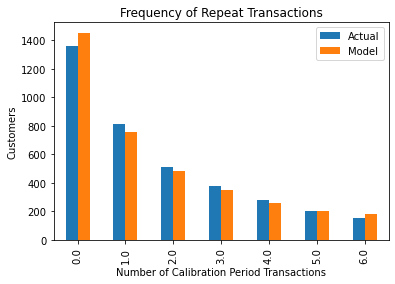

In [103]:
plot_period_transactions(mbg)

In [104]:
summary_mbg["actual_30"] = summary_mbg["frequency"]/summary_mbg["recency"]*30

In [105]:
summary_mbg = summary_mbg.fillna(value = 0)

In [106]:
summary_mbg["Error"] = summary_mbg["actual_30"] - summary_mbg["predicted_purchases"]

In [107]:
mse = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])

In [108]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.051990707259228
Average Error:  0.4093050827299788
Root Mean Squared Error: 2.0129557141823136


In [109]:
mbg_mse_purchase = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (summary_mbg["actual_30"].mean() - summary_mbg["predicted_purchases"].mean())

In [110]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [111]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 2819 subjects, p: 1.53, q: 3.67, v: 601.28>

In [112]:
summary_mbg_new = summary_mbg[(summary_mbg["monetary_value"] > 0) & (summary_mbg["frequency"] > 0)]

In [113]:
summary_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_mbg_new["frequency"], 
                                                                        summary_mbg_new["monetary_value"])

In [114]:
print("Expected Average Sales: %s" % summary_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_mbg_new["monetary_value"].mean())
print("Difference: %s" % (summary_mbg_new["monetary_value"].mean() - summary_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"])))

Expected Average Sales: 348.4002266940505
Actual Average Sales: 342.58160627695025
Difference: -5.818620417100249
Mean Squared Error: 18124.366876107306
Root Mean Squared Error: 134.62676879472116


In [115]:
summary_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       summary_mbg_new["frequency"],
                                                       summary_mbg_new["recency"],
                                                       summary_mbg_new["T"],
                                                       summary_mbg_new["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [116]:
summary_mbg_new["CLV"] = summary_mbg_new["predicted_clv"]*0.05

In [117]:
actual = summary_["monetary_value"]*summary_["actual_30"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T


In [118]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % (mean_squared_error(result["Actual"], result["Predicted"])))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 124.22712422351617
Mean Squared Error: 638099.7719534491
Root Mean Squared Error: 798.8114746005149


In [119]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]

In [120]:
data = [[bgf_mse_purchase_30, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_30, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_30, pareto_avg_error_purchase, mbg_avg_purchase_error]]

In [121]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)

In [122]:
model_purchase_result

,BG-NBD,Pareto-NBD,MBG-NBD
MSE Purchase Error,4.051991,4.039627,4.051991
RMSE Purchase Error,2.012956,2.009882,2.012956
Avg Purchase Error,0.409305,0.409597,0.409305


As we can see here is that there is no much difference when it comes to the performance of these models but Pareto NBD model is slightly performing better when it comes it minimizing the MSE & RMSE Errors.